# Euler Finance

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv("euler.csv") # Defi Llama
df.head()

,Unnamed: 0,Date,Timestamp,Euler,Euler.1,Euler.2,Euler.3,Euler.4,Euler.5,Euler.6,...,Euler.926,Euler.927,Euler.928,Euler.929,Euler.930,Euler.931,Euler.932,Euler.933,Euler.934,Euler.935
0,NaN,NaN,NaN,Lending,Lending,Lending,Lending,Lending,Lending,Lending,...,Lending,Lending,Lending,Lending,Lending,Lending,Lending,Lending,Lending,Lending
1,NaN,NaN,NaN,ethereum,ethereum-borrowed,Total,borrowed,ethereum,ethereum,ethereum,...,borrowed,borrowed,borrowed,borrowed,borrowed,borrowed,borrowed,borrowed,borrowed,borrowed
2,NaN,NaN,NaN,TVL,TVL,TVL,TVL,Tokens(USD),Tokens(USD),Tokens(USD),...,Tokens,Tokens,Tokens,Tokens,Tokens,Tokens,Tokens,Tokens,Tokens,Tokens
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BANK,TCR,CVX,...,NEXO,OS,CRV,BUSD,DFI,BAL,OHM,KP3R,ENJ,GUSD
4,NaN,12/12/2021,1.639267e+09,506.0319,NaN,506.0319,NaN,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# date
date = df.copy()
date = date.iloc[4:] # delete rows
date = date.reset_index(drop=True) # reset
date = date["Date"] # date

# Token Amount

In [5]:
# Token amount data
df0 = df.copy()
df0.columns = df0.iloc[3].values.tolist() # rename
df0 = df0.loc[:, df0.iloc[2] == "Tokens(USD)"] # delete columns
df0 = df0.loc[:, df0.iloc[1] == "Total"] # delete columns
df0 = df0.iloc[4:] # delete rows
df0 = df0.reset_index(drop=True) # reset
df0 = df0.apply(pd.to_numeric) # numeric
df0.head()

,BANK,TCR,CVX,ANT,MPL,AGEUR,USDT,WETH,ENS,RENDOGE,...,OS,RNDR,ENJ,KP3R,TSUKA,OHM,BAL,BUSD,ALCX,GUSD
0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,4.060770e+02,0.000000,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,4.135460e+02,0.000000,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.000000,0.0,0.000000,0.0,0.000000,0.0,990.764917,1.769187e+06,0.000000,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,16077.544899,0.0,3784.500000,0.0,0.000000,0.0,5830.867800,3.065849e+06,120784.443494,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,17587.150885,0.0,14190.740717,0.0,77586.301571,0.0,7966.029483,3.090466e+06,160107.984763,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# Token amount sum
df0["sum"] = df0.iloc[:, 0:-1].sum(axis=1) # sum

In [7]:
# Date + Token amount data + sum
df0 = pd.concat([date, df0], axis=1) # concatanate

In [8]:
# Token amount chart
#plt.bar(df0["Date"], df0["sum"])
#plt.show()

# Token Amount Difference

In [9]:
# Token amount difference data
df1 = df.copy()
df1.columns = df1.iloc[3].values.tolist() # rename
df1 = df1.loc[:, df1.iloc[2] == "Tokens(USD)"] # delete columns
df1 = df1.loc[:, df1.iloc[1] == "Total"] # delete columns
df1 = df1.iloc[4:] # delete rows
df1 = df1.reset_index(drop=True) # reset
df1 = df1.apply(pd.to_numeric) # numeric
df1 = df1.diff() # difference
df1.iloc[0] = pd.Series(np.zeros(df1.shape[1]), index=df1.columns) # fill
df1.head()

,BANK,TCR,CVX,ANT,MPL,AGEUR,USDT,WETH,ENS,RENDOGE,...,OS,RNDR,ENJ,KP3R,TSUKA,OHM,BAL,BUSD,ALCX,GUSD
0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000e+00,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,7.469000e+00,0.000000,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.000000,0.0,0.000000,0.0,0.000000,0.0,990.764917,1.768773e+06,0.000000,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,16077.544899,0.0,3784.500000,0.0,0.000000,0.0,4840.102883,1.296662e+06,120784.443494,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1509.605986,0.0,10406.240717,0.0,77586.301571,0.0,2135.161683,2.461723e+04,39323.541269,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# Token amount difference sum
df1["sum"] = df1.iloc[:, 0:-1].sum(axis=1) # sum

In [11]:
# Date + Token amount difference data + sum
df1 = pd.concat([date, df1], axis=1) # concatanate

In [12]:
# Token amount difference chart
#plt.bar(df1["Date"], df1["sum"])
#plt.show()

# Euler Hack

In [13]:
# Euler hack (cf. 14/03/2023)
dates_to_select = ["12/03/2023", "13/03/2023", "14/03/2023", "15/03/2023"]
selected_rows = df1[df1["Date"].isin(dates_to_select)]
selected_rows

,Date,BANK,TCR,CVX,ANT,MPL,AGEUR,USDT,WETH,ENS,...,RNDR,ENJ,KP3R,TSUKA,OHM,BAL,BUSD,ALCX,GUSD,sum
447,12/03/2023,-194.804141,NaN,-1927.319208,58.128480,-8.430022,-35307.724699,-2.160938e+06,-1.569816e+07,-15808.961009,...,NaN,-4.207995,1750.354774,0.001266,-14679.188781,9.204608,-0.592947,510.979785,NaN,-4.365934e+07
448,13/03/2023,2629.855910,NaN,1874.829220,465.027837,12.343961,72106.156894,1.259258e+06,1.102309e+07,35033.174422,...,NaN,17.203752,1023.576982,0.003276,-6664.381158,70.568665,174.274215,74.637492,NaN,3.075660e+07
449,14/03/2023,97.402071,NaN,-1378.758701,77.504640,9.032167,NaN,-2.219357e+06,-1.338729e+07,-160346.578656,...,NaN,NaN,-1722.281950,0.000067,-287832.175551,12.272811,-6987.941558,27.522575,-137495.100174,-2.389876e+08
450,15/03/2023,1753.237273,1.480040e-15,1146.046587,58.128480,18.666478,NaN,-6.525000e-06,2.782430e+01,10309.303210,...,1.100001e-13,NaN,179.115819,-0.003919,-0.067395,18.409217,-10.535255,55.511635,-2.134132,2.676450e+05


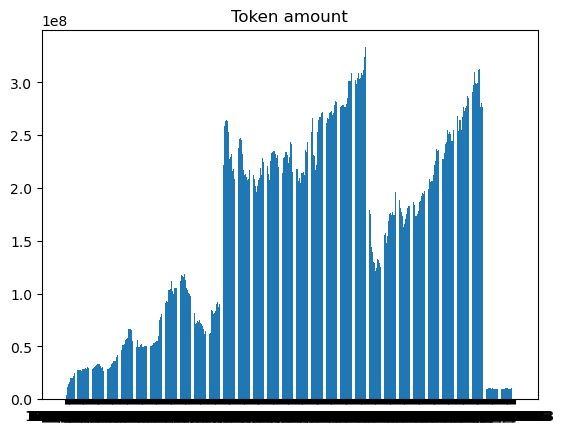

In [14]:
# Token amount chart (revisited)
plt.bar(df0["Date"], df0["sum"])
plt.title("Token amount")
plt.show()

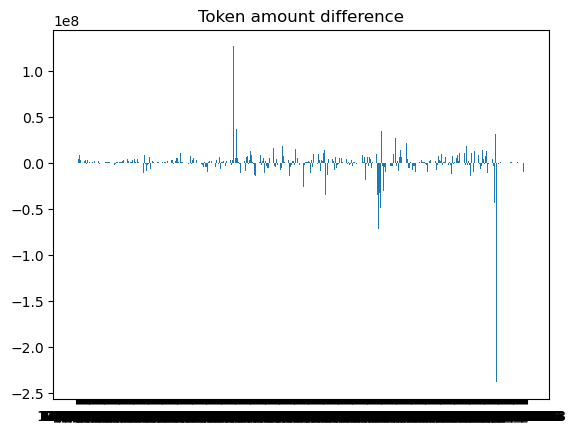

In [15]:
# Token amount difference chart (revisited)
plt.bar(df1["Date"], df1["sum"])
plt.title("Token amount difference")
plt.show()

# Rate Limiting Euler Hack

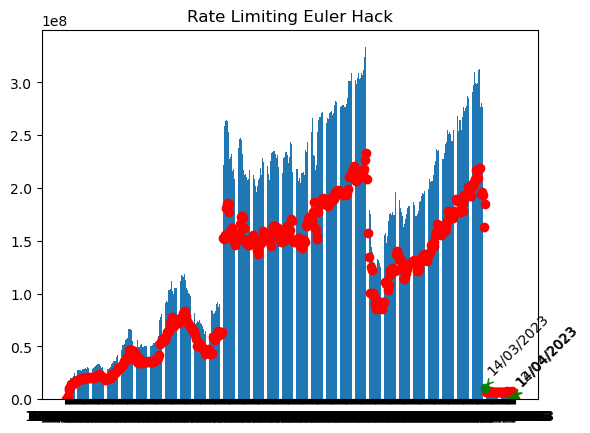

In [16]:
#Threshold
df0['sum_down30'] = df0['sum'].shift(1) * 0.7

fig, ax = plt.subplots()
ax.bar(df0['Date'], df0['sum'])
ax.plot(df0['Date'], df0['sum_down30'], 'o', color='red', label='30% drop threshold')
ax.set_title('Rate Limiting Euler Hack')

down30_points = df0[df0['sum'] < df0['sum_down30']]
ax.plot(down30_points['Date'], down30_points['sum'], 'o', color='green', label='Rate limiting')

for i in range(len(down30_points)):
    x = down30_points.iloc[i]['Date']
    y = down30_points.iloc[i]['sum']
    ax.annotate(down30_points.iloc[i]['Date'], xy=(x, y), 
                xytext=(0, 10), textcoords='offset points', rotation=45,
                arrowprops=dict(arrowstyle="->", color='green'))

plt.show()